In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from SUS.preprocessing import test_train_split
from SUS.SVM import SVC
from SUS.LogisticRegression import LogisticRegression
from SUS.KNearestNeighbour import knn
from SUS.preprocessing import Standard_Scaler
from SUS.Model_eval import F1_score

# DataSet:

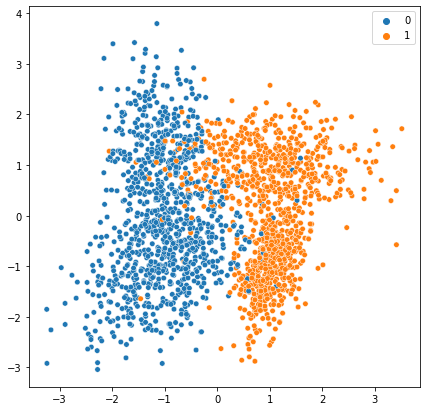

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)
X_test,y_test,X_train, y_train  = test_train_split(X, y)
plt.figure(figsize=(7, 7))
# Plotting our two-features-space
sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                hue=y, 
                s=30);
plt.show()

### Standered Scaling:

In [3]:
ss = Standard_Scaler()
X_tf = ss.fit_transform(X_train)
X_trf = ss.transform(X_test)

## Support Vector Machine:
### Algorithm:   
1. Equation for the linear hyperplane: $$y =w^T X -b$$ 
>where,    $w^T.x_i -b\geq1~~~~~~~if,~y_i=1$
         >>$w^T.x_i -b\leq1~~~~~~~if,~y_i=-1$

2. Hinge Loss:$$l = max(0,1-y_i(w.x_i-b))$$
> where,
$$    l= 
\begin{cases}
    0,& \text{if } y.f(x)\geq 1\\
    1-y.f(x),              & \text{otherwise}
\end{cases}
$$

3. After adding the Regulariser: $$L = \lambda||w||^2+\frac{1}{n}\sum_{i=0}^n max(0,1-y_i(w.x_i-b))$$
> where, $if~~y_i.f(x)\geq1~~~ then, ~L = \lambda||w||^2$
        >>$else,~~L = \lambda||w||^2+1-y_i(w.x_i-b)$
4. Gradient: 
>where,
>>$$if,~~y_i.f(x)\geq1~~~ then, \frac{\partial L}{\partial w} = 2\lambda w~~and~~\frac{\partial L}{\partial b}=0$$
>>$$else,~~\frac{\partial L}{\partial w} = 2\lambda w-y_i . x_i~~and~~\frac{\partial L}{\partial b}=y_i$$
5. Update rules: $$~~w_{i+1} = w_i -\alpha . \partial w~~~and~~~b_{i+1} = b_i -\alpha . \partial b$$
>where, $~\alpha \to ~learning~rate$
>> $~\lambda ~\to~regulariser$

Model converges: False 5000 iteration


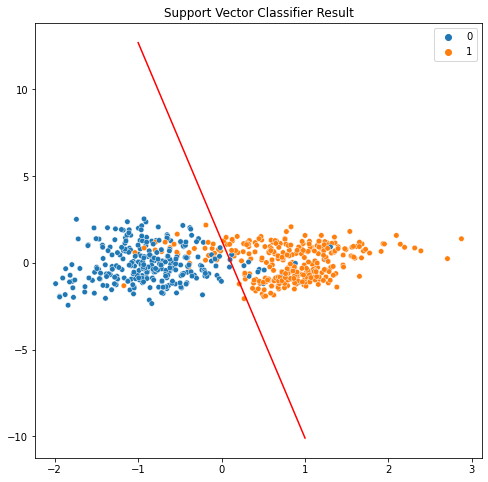

In [4]:
clf = SVC(learning_rate=0.00005,Regularizar=0.1,ntol=1e-5, maxiter=5000)
loss=clf.fit(X_tf,y_train)
ypred = clf.predict(X_trf)


plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_test[:, 0], 
                y=X_test[:, 1], 
                hue=y_test, 
                s=30);
# Constructing a hyperplane using a formula.
a = np.linspace(-1,1,100)
b = (-np.ones(100)*clf.w[0][0]/clf.w[0][2]-a*clf.w[0][1]/clf.w[0][2])

# Plotting a red hyperplane
plt.plot(a, b, c='r',);
plt.title("Support Vector Classifier Result")
plt.show()

# plt.plot(loss)

## K_NearestNeighbour:
### Algorithm:
1. Select the number K of the neighbors,
2. Calculate the Euclidean distance of K number of neighbors.
> where, $D^2_{a,b} = \sum_{k=0}^n(a_k-b_k)^2$
3. Take the K nearest neighbors as per the calculated Euclidean distance.
4. Among these k neighbors, count the number of the data points in each category.
5. Assign the new data points to that category for which the number of the neighbor is maximum.

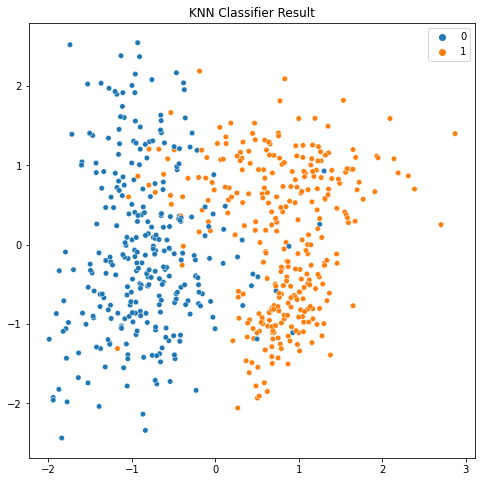

In [5]:
clf1 = knn(n_neighbours=4)
loss= clf1.fit(X_tf,y_train)
ypred1 = clf1.predict(X_trf)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_test[:, 0], 
                y=X_test[:, 1], 
                hue=y_test, 
                s=30);
plt.title("KNN Classifier Result")
plt.show()

## Logistic Regression:
### Algorithm:
1. Linear model: $$y = w^T x+b$$
2. Approximation:$$\hat y=\frac{1}{1+e^{-(w^T x+b)}}$$
3. Cross entropy: $$L = \frac{1}{N}\sum_{i=1}^{n}[y_i\log(\hat y_i)+(1-y_i)\log(1-\hat y_i)]$$   
4. Gradient Descent:$$\frac{\partial L}{\partial w} = \frac{1}{N}\sum_{i=0}^{n}2x_i^T(\hat y-y_i)$$
>and,$$\frac{\partial L}{\partial b} = \frac{1}{N}\sum_{i=0}^{n}2(\hat y-y_i)$$
5. Update rules:$$~~w_{i+1} = w_i -\alpha . \partial w~~~and~~~b_{i+1} = b_i -\alpha . \partial b$$
>where, $~\alpha \to ~learning~rate$

Model converge in 887 iteration


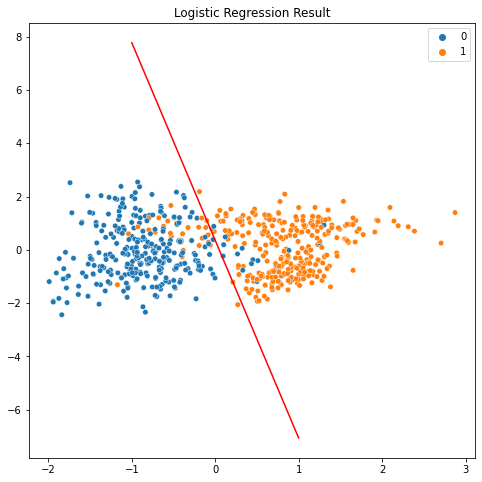

In [6]:
clf2 = LogisticRegression(learning_rate=1,n_iter=1000)
loss=clf2.fit(X_tf,y_train)
ypred2 = clf2.predict(X_trf)


plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_test[:, 0], 
                y=X_test[:, 1], 
                hue=y_test, 
                s=30);
# Constructing a hyperplane using a formula.
a = np.linspace(-1,1,100)
b = (-np.ones(100)*clf2.w[0]/clf2.w[2]-a*clf2.w[1]/clf2.w[2])

# Plotting a red hyperplane
plt.plot(a, b, c='r',);
plt.title("Logistic Regression Result")
plt.show()

# plt.plot(loss)

In [7]:
a,b,c = F1_score(y_test,ypred),F1_score(y_test,ypred1),F1_score(y_test,ypred2)

In [8]:
print("Classification Report:"+'\n')
print("Svm Model F1 report: ")
print('Model accuracy: '+str(a[0]))
print('Model precision: '+str(a[1]))
print('Model recall: '+str(a[2]))
print('Model F1_score: '+str(a[3]))
print('Model Errors: '+str(a[4])+'\n')

print("Knn Model F1 report: ")
print('Model accuracy: '+str(a[0]))
print('Model precision: '+str(a[1]))
print('Model recall: '+str(a[2]))
print('Model F1_score: '+str(a[3]))
print('Model Errors: '+str(a[4])+'\n')

print("Logistic Regression Model F1 report: ")
print('Model accuracy: '+str(a[0]))
print('Model precision: '+str(a[1]))
print('Model recall: '+str(a[2]))
print('Model F1_score: '+str(a[3]))
print('Model Errors: '+str(a[4])+'\n')

Classification Report:

Svm Model F1 report: 
Model accuracy: 0.9233333333333333
Model precision: 0.9515570934256056
Model recall: 0.8957654723127035
Model F1_score: 0.9228187919463087
Model Errors: 46

Knn Model F1 report: 
Model accuracy: 0.9233333333333333
Model precision: 0.9515570934256056
Model recall: 0.8957654723127035
Model F1_score: 0.9228187919463087
Model Errors: 46

Logistic Regression Model F1 report: 
Model accuracy: 0.9233333333333333
Model precision: 0.9515570934256056
Model recall: 0.8957654723127035
Model F1_score: 0.9228187919463087
Model Errors: 46

